<a href="https://colab.research.google.com/github/Om-Shree-0709/Pytorch/blob/main/FeatureNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [6]:
print(df.head())

   Class label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36
3            1    14.37        1.95
4            1    13.24        2.59


**Kernel Density Estimation plot**

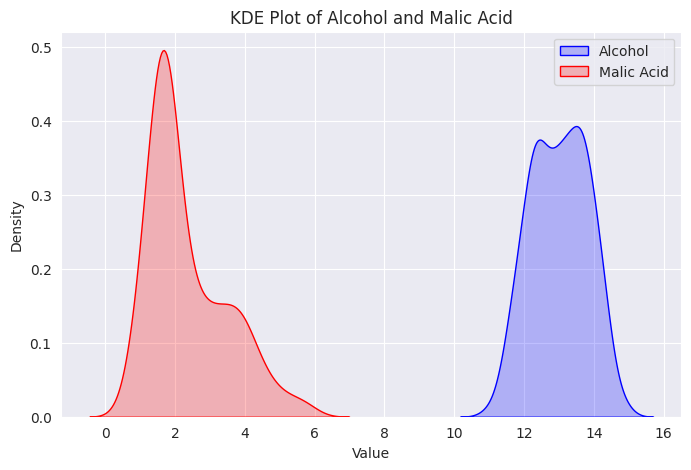

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Alcohol'], label="Alcohol", fill=True, color="blue")
sns.kdeplot(df['Malic acid'], label="Malic Acid", fill=True, color="red")

plt.title("KDE Plot of Alcohol and Malic Acid")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

**Scatter Plot**

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

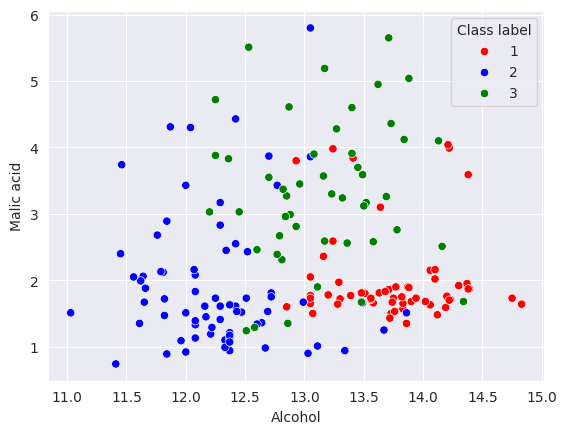

In [19]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', data=df, palette=color_dict)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0)

x_train.shape , x_test.shape

((124, 2), (54, 2))

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#fit the scaler to the train set , it will learn the parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
#converting back the Scaked data from Pandas Array to DataFrame again
X_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [23]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [27]:
np.round(X_train_scaled.describe(), 1)
# As we can see our Min = 0.0 and Max = 1.0
# we cant predict about the Mean and the standard deviation

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


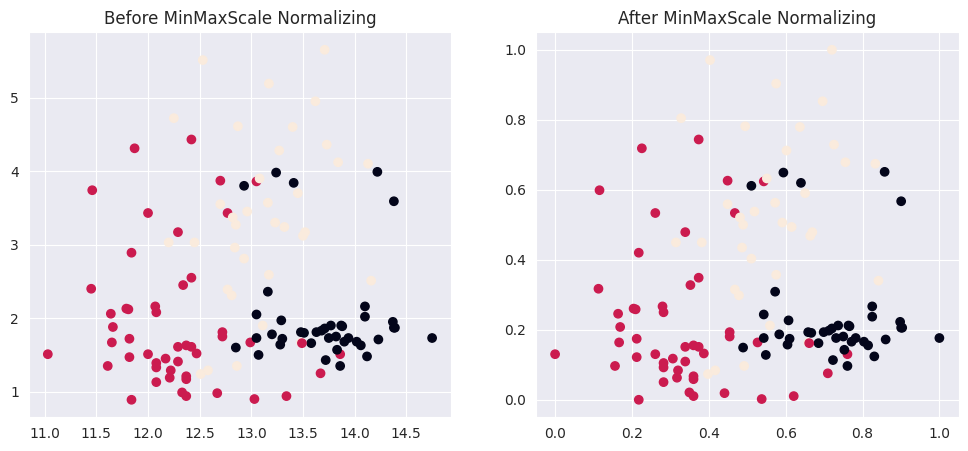

In [34]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title('Before MinMaxScale Normalizing')

ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After MinMaxScale Normalizing')

plt.show()

<Axes: title={'center': 'Before MinMaxScale Normalizing'}, xlabel='Alcohol', ylabel='Density'>

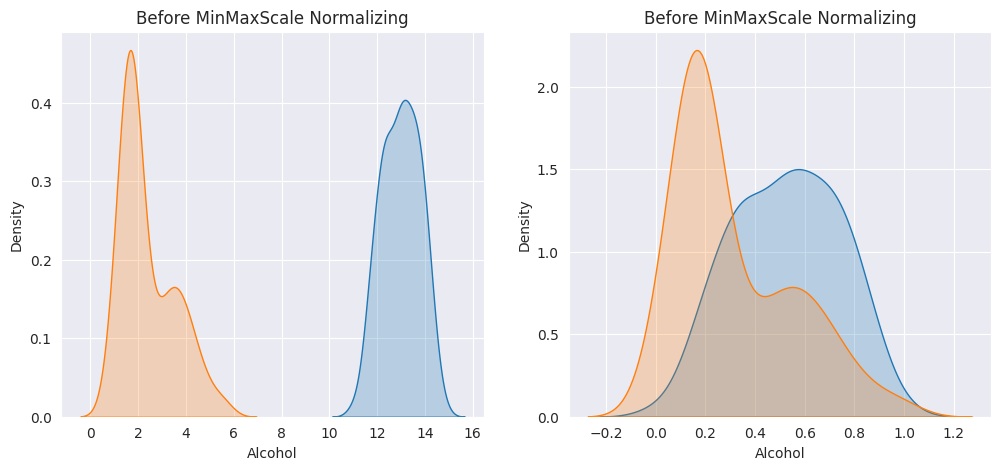

In [40]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))
#before Scaling
ax1.set_title('Before MinMaxScale Normalizing')
sns.kdeplot(x_train['Alcohol'],ax=ax1,fill=True)
sns.kdeplot(x_train['Malic acid'],ax=ax1,fill=True)

#after Scaling
ax2.set_title('Before MinMaxScale Normalizing')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,fill=True)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2,fill=True)